In [13]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [14]:
from sklearn.metrics import roc_curve,auc

In [16]:
# Read data
trainData = pd.read_table("/Users/stevenzhai/Desktop/FTE4560/overTrain.csv", sep=",")
trainDX = trainData[trainData.columns.values[:-1]]
trainDY = trainData[["class"]]

testData = pd.read_table("/Users/stevenzhai/Desktop/FTE4560/NormalTest.csv", sep=",")
testDX = testData[testData.columns.values[:-1]]
testDY = testData[["class"]]

In [17]:
#Add a column of 1 for the X
trainDX['Attr0'] = 1.0
testDX['Attr0'] = 1.0

In [18]:
# Define sigmoid function
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

In [19]:
# Define Gradient Descent Method without regularization
def gradientDescent(X,Y):
    dataMatrix = np.mat(X)
    classMatrix = np.mat(Y)
    num_sample, num_parameter = np.shape(dataMatrix)
    #initialize the weights
    weights1 = np.zeros((num_parameter,1))
    weights2 = np.zeros((num_parameter,1))
    step_size = 0.01
    max_iter = 50000
    episilon = 0.0000001
    num_iter = 0
    while(num_iter < max_iter):
        num_iter+=1
        weights2 = weights1
        y = sigmoid(dataMatrix*weights1)
        error = y - classMatrix 
        weights1 = weights1 - (step_size)*dataMatrix.transpose()*error/len(classMatrix)
        if all(abs(weights2-weights1) < episilon):
            break
    return weights1

In [28]:
weight = gradientDescent(trainDX,trainDY)

In [20]:
def logistic(train_X,train_Y,test_X,test_Y):
    temp_weight = gradientDescent(train_X,train_Y)
    pred_train_Y = pd.DataFrame(sigmoid(train_X.to_numpy()*temp_weight))
    #classify the prediction results for training set
    for i in range(len(pred_train_Y)):
        if pred_train_Y.iloc[i,0] <= 0.5:
            pred_train_Y.iloc[i,0] = 0
        else:
            pred_train_Y.iloc[i,0] = 1       
    TP_train = 0
    FP_train = 0
    TN_train = 0
    FN_train = 0
    #calculate TP,FP,TN,FN
    for j in range(len(pred_train_Y)):
        if (pred_train_Y.iloc[j,0] == 1 and train_Y.iloc[j,0] == 1):
            TP_train += 1
        elif (pred_train_Y.iloc[j,0] == 1 and train_Y.iloc[j,0] == 0):
            FP_train += 1
        elif (pred_train_Y.iloc[j,0] == 0 and train_Y.iloc[j,0] == 0):
            TN_train += 1
        else:
            FN_train += 1
            
    train_accuracy = (TP_train + TN_train)/(TP_train + FP_train + TN_train + FN_train)
    train_precision = TP_train/(TP_train + FP_train)
    train_recall = TP_train/(TP_train + FN_train)
    train_F1_score = 2*train_precision*train_recall/(train_precision+train_recall)
    
    #classify the prediction results for the test set
    pred_test_Y = pd.DataFrame(sigmoid(test_X.to_numpy()*temp_weight))
    for m in range(len(pred_test_Y)):
        if pred_test_Y.iloc[m,0] <= 0.5:
            pred_test_Y.iloc[m,0] = 0
        else:
            pred_test_Y.iloc[m,0] = 1       
    TP_test = 0
    FP_test = 0
    TN_test = 0
    FN_test = 0
    #calculate TP,FP,TN,FN
    for n in range(len(pred_test_Y)):
        if (pred_test_Y.iloc[n,0] == 1 and test_Y.iloc[n,0] == 1):
            TP_test += 1
        elif (pred_test_Y.iloc[n,0] == 1 and test_Y.iloc[n,0] == 0):
            FP_test += 1
        elif (pred_test_Y.iloc[n,0] == 0 and test_Y.iloc[n,0] == 0):
            TN_test += 1
        else:
            FN_test += 1
    
    test_accuracy = (TP_test + TN_test)/(TP_test + TN_test + FN_test + FP_test)
    test_precision = TP_test/(TP_test + FP_test)
    test_recall = TP_test/(TP_test + FN_test)
    test_F1_score = 2*test_precision*test_recall/(test_precision+test_recall)
    
    return(prob,train_accuracy,train_precision,train_recall,train_F1_score,test_accuracy,test_precision,test_recall,test_F1_score)

In [27]:
logistic(trainDX,trainDY,testDX,testDY)

(0.5,
 0.7881981032665965,
 0.8275862068965517,
 0.10909090909090909,
 0.19277108433734938,
 0.7152317880794702,
 0.5666666666666667,
 0.6666666666666666,
 0.6126126126126126)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass pos_label=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass pos_label=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


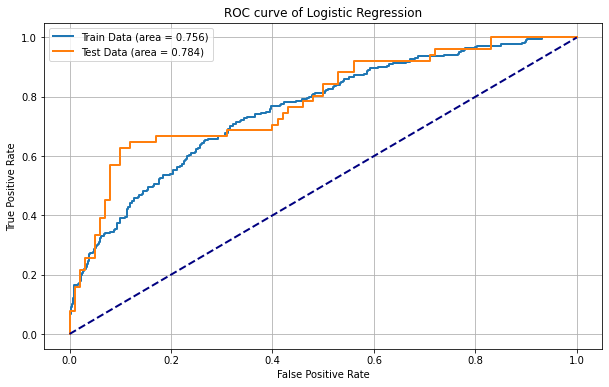

In [42]:
#Plot the ROC curve
prob = sigmoid(trainDX.to_numpy()*weight)
prob2 = sigmoid(testDX.to_numpy()*weight)
plt.figure(figsize=(10,6))
FPR,TPR,threshold = roc_curve(trainDY,prob,1)
FPR2,TPR2,threshold2 = roc_curve(testDY,prob2,1)
roc_auc = auc(FPR,TPR)
roc_auc2 = auc(FPR2,TPR2)
plt.plot(FPR,TPR,lw=2,label = 'Train Data'+' (area = %0.3f)'%roc_auc)
plt.plot(FPR2,TPR2,lw=2,label = 'Test Data'+' (area = %0.3f)'%roc_auc2)
plt.plot([0,1],[0,1],color = 'navy',lw = 2, linestyle = '--')
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of Logistic Regression")
plt.legend()
plt.show()

In [21]:
#define gradient descent with regularization
def gradientDescent_reg(X,Y,lam):
    dataMatrix = np.mat(X)
    classMatrix = np.mat(Y)
    num_sample, num_parameter = np.shape(dataMatrix)
    #initialize the weights
    weights1 = np.zeros((num_parameter,1))
    weights2 = np.zeros((num_parameter,1))
    step_size = 0.01
    max_iter = 50000
    episilon = 0.0000001
    num_iter = 0
    while(num_iter < max_iter):
        num_iter+=1
        weights2 = weights1
        y = sigmoid(dataMatrix*weights1)
        error = y - classMatrix 
        weights1 = weights1 - (step_size)*(dataMatrix.transpose()*error+lam*weights1)/len(classMatrix)
        if all(abs(weights2-weights1) < episilon):
            break
    return weights1

In [22]:
#Define cross-validation for logistic with regularization to test accuracy
def cross_validation_regularize(X,Y,lam):
    #Create the fold to save precision
    precision_train = []
    precision_vali = []
    recall_train = []
    recall_vali = []
    accuracy_train = []
    accuracy_vali = []
    # Set the seed
    random.seed(1)
    # Divide indices of data into 10 folds randomly
    row = X.shape[0]
    index = [int(i) for i in np.linspace(0, row-1, row)]
    random.shuffle(index)
    # Use 10-fold cross validation to estimate the error rate
    folds = 10
    for i in range(0, folds):
        # For each fold, calculate the accuracy
        vali_index = index[int(row/folds*i):int(row/folds*(i+1))]
        # Train set has 9 folds and validation set has 1 fold
        vali_x = X.iloc[vali_index]
        vali_y = Y.iloc[vali_index]
        train_x = X.iloc[list(set(index)-set(vali_index))]
        train_y = Y.iloc[list(set(index)-set(vali_index))]
        temp_weight = gradientDescent_reg(train_x,train_y,lam)
        #predict result for the train set
        pred_train_y = sigmoid(train_x.to_numpy()*temp_weight)
        pred_train_y = pd.DataFrame(pred_train_y)
        for j in range(len(pred_train_y)):
            if pred_train_y.iloc[j,0] <= 0.5:
                pred_train_y.iloc[j,0] = 0
            else:
                pred_train_y.iloc[j,0] = 1
        TP_train = 0
        FP_train = 0
        FN_train = 0
        TN_train = 0
        for k in range(len(pred_train_y)):
            if pred_train_y.iloc[k,0] == 1 and train_y.iloc[k,0] == 1:
                TP_train+=1
            elif pred_train_y.iloc[k,0] == 1 and train_y.iloc[k,0] == 0:
                FP_train+=1
            elif pred_train_y.iloc[k,0] == 0 and train_y.iloc[k,0] == 1:
                FN_train+=1
            else:
                TN_train+=1
        precision_train.append(TP_train/(TP_train+FP_train))
        recall_train.append(TP_train/(TP_train + FN_train))
        accuracy_train.append((TP_train+TN_train)/(TP_train+TN_train+FP_train+FN_train))
        #predict result for the test set
        pred_vali_y = sigmoid(vali_x.to_numpy()*temp_weight)
        pred_vali_y = pd.DataFrame(pred_vali_y)
        for j in range(len(pred_vali_y)):
            if pred_vali_y.iloc[j,0] <= 0.5:
                pred_vali_y.iloc[j,0] = 0
            else:
                pred_vali_y.iloc[j,0] = 1
        TP_vali = 0
        FP_vali = 0
        FN_vali = 0
        TN_vali = 0
        for k in range(len(pred_vali_y)):
            if pred_vali_y.iloc[k,0] == 1 and vali_y.iloc[k,0] == 1:
                TP_vali+=1
            elif pred_vali_y.iloc[k,0] == 1 and vali_y.iloc[k,0] == 0:
                FP_vali+=1
            elif pred_vali_y.iloc[k,0] == 0 and vali_y.iloc[k,0] == 1:
                FN_vali+=1
            else:
                TN_vali+=1
        if(TP_vali+FP_vali != 0):
            precision_vali.append(TP_vali/(TP_vali+FP_vali))
        else:
            precision_vali.append(0)
        recall_vali.append(TP_vali/(TP_vali+FN_vali))
        accuracy_vali.append((TP_vali+TN_vali)/(TP_vali+TN_vali+FP_vali+FN_vali))
        
        
    F1_train = [2*precision_train[i]*recall_train[i]/(precision_train[i]+recall_train[i]) for i in range(len(precision_train))]    
    F1_vali = [2*precision_vali[i]*recall_vali[i]/(precision_vali[i]+recall_vali[i]) for i in range(len(precision_vali)) if precision_vali != None and (precision_vali[i]+recall_vali[i]) != 0]
    precision_vali = list(filter(None,precision_vali))
    return(np.mean(accuracy_train),np.mean(precision_train),np.mean(recall_train),np.mean(F1_train),np.mean(accuracy_vali),np.mean(precision_vali),np.mean(recall_vali),np.mean(F1_vali))

In [53]:
temp = cross_validation_regularize(trainDX,trainDY,0)

In [23]:
def ten_CV_plot(train_x,train_y,para):
    accuracy = []
    precision = []
    recall = []
    F1 = []
    for i in np.linspace(0,para,11):
        k = cross_validation_regularize(train_x,train_y,i)
        accuracy.append(k[4])
        precision.append(k[5])
        recall.append(k[6])
        F1.append(k[7])
    fig = plt.figure()
    plt.xlabel("lambda")
    plt.ylabel("Rate")
    plt.grid()
    plt.ylim(0,1.2)
    plt.plot(np.linspace(0,para,11), precision,marker="o",markerfacecolor="brown",label="Precision")
    plt.plot(np.linspace(0,para,11),recall,marker="o",markerfacecolor="purple",label="Recall")
    plt.plot(np.linspace(0,para,11),F1,marker="o",markerfacecolor="burlywood",label="F1 Score")
    plt.plot(np.linspace(0,para,11),accuracy,marker="o",markerfacecolor="aliceblue",label="Accuracy")
    plt.title("Metrics of Logistic Regression with L2-norm")
    plt.legend()
    plt.savefig("/Users/stevenzhai/Desktop/FTE4560/CV_log.png")
    plt.show()

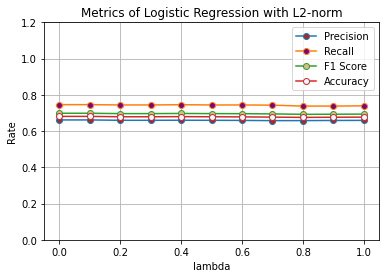

In [24]:
ten_CV_plot(trainDX,trainDY,1)

In [70]:
def logistic_reg(train_X,train_Y,test_X,test_Y):
    temp_weight = gradientDescent_reg(train_X,train_Y,0.2)
    pred_train_Y = pd.DataFrame(sigmoid(train_X.to_numpy()*temp_weight))
    #classify the prediction results for training set
    for i in range(len(pred_train_Y)):
        if pred_train_Y.iloc[i,0] <= 0.5:
            pred_train_Y.iloc[i,0] = 0
        else:
            pred_train_Y.iloc[i,0] = 1       
    TP_train = 0
    FP_train = 0
    TN_train = 0
    FN_train = 0
    #calculate TP,FP,TN,FN
    for j in range(len(pred_train_Y)):
        if (pred_train_Y.iloc[j,0] == 1 and train_Y.iloc[j,0] == 1):
            TP_train += 1
        elif (pred_train_Y.iloc[j,0] == 1 and train_Y.iloc[j,0] == 0):
            FP_train += 1
        elif (pred_train_Y.iloc[j,0] == 0 and train_Y.iloc[j,0] == 0):
            TN_train += 1
        else:
            FN_train += 1
            
    train_accuracy = (TP_train + TN_train)/(TP_train + FP_train + TN_train + FN_train)
    train_precision = TP_train/(TP_train + FP_train)
    train_recall = TP_train/(TP_train + FN_train)
    train_F1_score = 2*train_precision*train_recall/(train_precision+train_recall)
    
    #classify the prediction results for the test set
    pred_test_Y = pd.DataFrame(sigmoid(test_X.to_numpy()*temp_weight))
    for m in range(len(pred_test_Y)):
        if pred_test_Y.iloc[m,0] <= 0.5:
            pred_test_Y.iloc[m,0] = 0
        else:
            pred_test_Y.iloc[m,0] = 1       
    TP_test = 0
    FP_test = 0
    TN_test = 0
    FN_test = 0
    #calculate TP,FP,TN,FN
    for n in range(len(pred_test_Y)):
        if (pred_test_Y.iloc[n,0] == 1 and test_Y.iloc[n,0] == 1):
            TP_test += 1
        elif (pred_test_Y.iloc[n,0] == 1 and test_Y.iloc[n,0] == 0):
            FP_test += 1
        elif (pred_test_Y.iloc[n,0] == 0 and test_Y.iloc[n,0] == 0):
            TN_test += 1
        else:
            FN_test += 1
    
    test_accuracy = (TP_test + TN_test)/(TP_test + TN_test + FN_test + FP_test)
    test_precision = TP_test/(TP_test + FP_test)
    test_recall = TP_test/(TP_test + FN_test)
    test_F1_score = 2*test_precision*test_recall/(test_precision+test_recall)
    
    return(train_accuracy,train_precision,train_recall,train_F1_score,test_accuracy,test_precision,test_recall,test_F1_score)

In [80]:
logistic_reg(trainDX,trainDY,testDX,testDY)

(0.6995884773662552,
 0.6789667896678967,
 0.757201646090535,
 0.715953307392996,
 0.6291390728476821,
 0.46835443037974683,
 0.7254901960784313,
 0.5692307692307692)

In [73]:
weight2 = gradientDescent_reg(trainDX,trainDY,0.2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass pos_label=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass pos_label=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


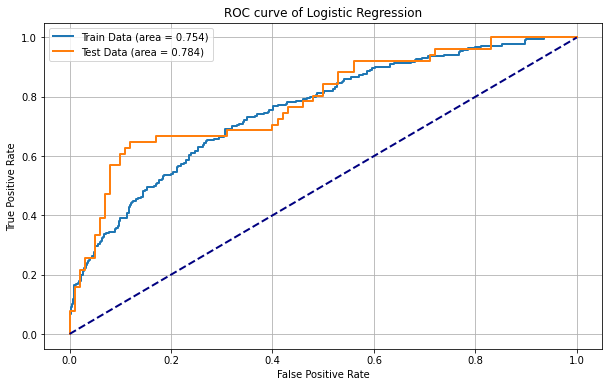

In [74]:
prob3 = sigmoid(trainDX.to_numpy()*weight2)
prob4 = sigmoid(testDX.to_numpy()*weight2)
plt.figure(figsize=(10,6))
FPR,TPR,threshold = roc_curve(trainDY,prob3,1)
FPR2,TPR2,threshold2 = roc_curve(testDY,prob4,1)
roc_auc = auc(FPR,TPR)
roc_auc2 = auc(FPR2,TPR2)
plt.plot(FPR,TPR,lw=2,label = 'Train Data'+' (area = %0.3f)'%roc_auc)
plt.plot(FPR2,TPR2,lw=2,label = 'Test Data'+' (area = %0.3f)'%roc_auc2)
plt.plot([0,1],[0,1],color = 'navy',lw = 2, linestyle = '--')
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of Logistic Regression")
plt.legend()
plt.show()